In [1]:

# coding: utf-8

import os

def get_filepaths(directory):
    """
    This function will generate the file names in a directory 
    tree by walking the tree either top-down or bottom-up. For each 
    directory in the tree rooted at directory top (including top itself), 
    it yields a 3-tuple (dirpath, dirnames, filenames).
    """
    file_paths = []  # List which will store all of the full filepaths.

    # Walk the tree.
    for root, directories, files in os.walk(directory):
        for filename in files:
            # Join the two strings in order to form the full filepath.
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)  # Add it to the list.

    return file_paths  # Self-explanatory.


In [2]:
import numpy as np

def calculate_slope(path):
    '''
    The format of the input file is like this:
    
    [0, 1, 2, 3, 4]
    [0.9, 1,2, 1.4, 1.56, 2]
    '''
    f = open(path, 'r')
    lines = f.readlines(0)
    _index = 0
    
    a = []
    b = []
    for line in lines:
        _index += 1
        if _index == 1:
            _a = line.replace("[","").replace("]","").split(", ")
            for __a in _a:
                a.append(int(__a))
        else:
            _b = line.replace("[","").replace("]","").split(", ")
            for __b in _b:
                b.append(float(__b))
    
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)

    logA = np.where(a>0, np.log10(a), 0)
    logB = np.where(b>0, np.log10(b), 0)

    coefficients = np.polyfit(logA, logB, 1)
    polynomial = np.poly1d(coefficients)
    return abs(1-polynomial[1])
        

In [3]:
#calculate_slope("C:\\Users\\Administrator\\Desktop\\2015\\9_2015_yeartxt3.txt")

In [15]:
def get_lists():
    lists = []
    for i in range(1, 14):
        lists.append([])
    
    for domain in range(1,14):
        for year_category in range(1, 11):
            path = "C:\\Github\\Preferential-attachment\\Preferential-attachment\\data\\170722\\2010\\"+str(domain)+"_2015_yeartxt"+str(year_category)+".txt"
            f = open(path, 'r')
            lists[domain-1].append(calculate_slope(path)) 
    return lists

In [16]:
#!pip install seaborn

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


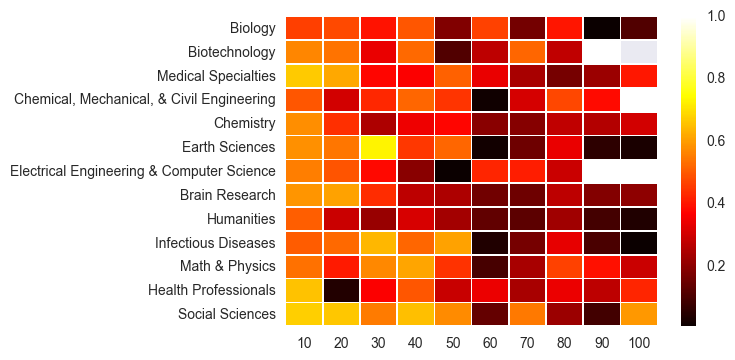

In [17]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#ax = plt.subplots()
#a = np.asarray(get_lists())
#where_are_NaNs = np.isnan(a)
#a[where_are_NaNs] = 0
row_labels = ['10','20','30', '40','50', '60', '70', '80', '90', '100']
column_labels = ['Biology','Biotechnology', 'Medical Specialties', 'Chemical, Mechanical, & Civil Engineering', 
                 'Chemistry', 'Earth Sciences', 'Electrical Engineering & Computer Science', 'Brain Research', 
                 'Humanities', 'Infectious Diseases', 'Math & Physics', 'Health Professionals', 'Social Sciences']

ax = sns.heatmap(get_lists(), 
                 linewidths=0.5, cmap = 'hot')
#ax = sns.heatmap(get_lists(), center = 1)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.yticks(rotation=0) 
plt.show()
